## Instructions

1. **Labeling & Peer Grading:** Your homework will be peer graded. To stay anonymous, avoid using your name and label your file with the last four digits of your student ID (e.g., HW#_Solutions_3938).

2. **Submission:** Submit both your IPython notebook (.ipynb) and an HTML file of the notebook to Canvas under Assignments → HW # → Submit Assignment. After submitting, download and check the files to make sure that you've uploaded the correct versions. Both files are required for your HW to be graded.
3. 
 <font color='red'> No pdf file required so write all the details in your ipynb file.</font>
2. **AI Use Policy:** Solve each problem independently by yourself. Use AI tools like ChatGPT or Google Gemini for brainstorming and learning only—copying AI-generated content is prohibited. You do not neeViolations will lead to penalties, up to failing the course.

3. **Problem Structure:** <font color='red'>Break down each problem ( already done in most problems) into three interconnected parts and implement each in separate code cells. Ensure that each part logically builds on the previous one. Include comments in your code to explain its purpose, followed by a Markdown cell analyzing what was achieved. After completing all parts, add a final Markdown cell reflecting on your overall approach, discussing any challenges faced, and explaining how you utilized AI tools in your process.
</font>
4. **Deadlines & Academic Integrity:** This homework is due on 10/01/2024 at midnight. <font color='red'>Disclosure of this assignment and assignment answers to anyone or any website is a contributory infringement of academic dishonesty at ISU. Do not share or post course materials without the express written consent of the copyright holder and instructor. The class will follow Iowa State University’s policy on academic dishonesty. Anyone suspected of academic dishonesty will be reported to the Dean of Students Office.</font>

#### Each problem is worth 25 points. Total $\bf 25\times 4 = 100$.

### Problem 1. 
Upload the textdata.csv and preprocess the text excerpts in the text column. 
* Find the various numerical information related to these text excerpts and add them to the textdata.csv as new columns with appropriate labels. The target variable "Bradley-Terry_Score"(https://en.wikipedia.org/wiki/Bradley%E2%80%93Terry_model) is related to the readability of the text excerpt; use the following links to learn more about various other scores and create new columns ( at least 10) with each text excerpts respective score and add the columns in the data. More information on text statistics are in https://pypi.org/project/textatistic and  https://pypi.org/project/textstat/
* Perform feature selection using methods such as correlation analysis, Recursive Feature Elimination (RFE), SelectKBest, or other relevant techniques, considering Bradley_Terry_Score as the target. Display a correlation heat map of the selected features and the target variable. 
* Create multiple linear regression models using Bradley_Terry_Score as the target variable, testing with three different test set sizes: 20%, 25%, and 30%. Cross-validate all models and summarize the test set metrics, including Mean Absolute Deviation (MAD), and R-squared (R²) in a table to identify the best model. Assess the suitability of developing a regression model for this problem, and provide your rationale based on the data and analysis results.


## Libraries

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 20)

## Config

In [112]:
data_loc = "/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/Data/"
file_name = "textdata.csv"

## Import dataset

In [113]:
text_df = pd.read_csv(data_loc + file_name)
rows, columns = text_df.shape
print(f"The dataset contains {rows:,} rows and {columns} columns")
text_df.head(20)

The dataset contains 2,834 rows and 3 columns


,textid,text,Bradly_Terry_Score
0,c12129c31,When the young people returned to the ballroom...,-0.340259
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118
3,dd1000b26,And outside before the palace a great garden w...,-1.054013
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197
5,f9bf357fe,Hal and Chester found ample time to take an in...,-0.861809
6,eaf8e7355,Hal Paine and Chester Crawford were typical Am...,-1.759061
7,0a43a07f1,"On the twenty-second of February, 1916, an aut...",-0.952325
8,f7eff7419,The boys left the capitol and made their way d...,-0.371641
9,d96e6dbcd,One day he had gone beyond any point which he ...,-1.238432


* Find the various numerical information related to these text excerpts and add them to the textdata.csv as new columns with appropriate labels. The target variable "Bradley-Terry_Score"(https://en.wikipedia.org/wiki/Bradley%E2%80%93Terry_model) is related to the readability of the text excerpt; use the following links to learn more about various other scores and create new columns ( at least 10) with each text excerpts respective score and add the columns in the data. More information on text statistics are in https://pypi.org/project/textatistic and  https://pypi.org/project/textstat/

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from wordcloud import STOPWORDS
import textstat
from textatistic import Textatistic
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('punkt_tab', 'vader_lexicon')


[nltk_data] Downloading package punkt_tab to vader_lexicon...
[nltk_data]   Package punkt_tab is already up-to-date!


True

#### Subjectivity & Polarity

In [115]:
stops = list(STOPWORDS)
print(stops)

# Compute text analysis scores
sia = SentimentIntensityAnalyzer()
text_df['tokens'] = text_df['text'].apply(lambda x: [word.lower() for word in word_tokenize(x)])
text_df['tokens'] = text_df['tokens'].apply(lambda x: [item for item in x if item not in stops])
text_df['subjectivity'] = text_df.apply(lambda x: TextBlob(x['text']).sentiment.subjectivity, axis=1)
text_df['polarity'] = text_df.apply(lambda x: TextBlob(x['text']).sentiment.polarity, axis=1)
text_df['sia_polarity'] = text_df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
text_df['sia_neutrality'] = text_df['text'].apply(lambda x: sia.polarity_scores(x)['neu'])

# Display
rows, columns = text_df.shape
print(f"The dataset contains {rows:,} rows and {columns} columns")
text_df.head()

["don't", 'are', "i'd", 'just', 'hence', 'shall', "when's", 'so', 'any', "wasn't", 'having', 'does', 'the', "that's", 'r', 'can', 'at', 'and', 'has', 'yourselves', 'yourself', 'otherwise', 'those', 'same', "they're", 'few', 'is', 'which', 'who', 'ought', 'each', 'itself', 'our', 'com', "how's", "won't", "they'd", 'further', "who's", "you'll", 'theirs', 'ever', 'else', 'whom', 'only', "i'm", 'its', 'because', "they'll", 'would', 'they', "where's", 'his', 'ourselves', 'here', 'a', 'cannot', 'that', 'if', 'once', 'most', 'but', "hasn't", "it's", 'why', 'other', 'such', 'what', 'being', "why's", "she'd", 'into', 'off', 'before', 'how', "mustn't", 'between', 'these', "doesn't", 'up', 'i', "they've", "can't", 'your', "he's", 'their', 'against', 'http', 'than', 'where', 'over', "she'll", 'above', "isn't", 'www', "aren't", 'again', 'out', "we'll", 'you', 'should', 'from', 'we', 'while', 'myself', "shouldn't", 'until', 'was', 'for', 'k', "weren't", 'have', 'there', 'about', 'more', "haven't", '

,textid,text,Bradly_Terry_Score,tokens,subjectivity,polarity,sia_polarity,sia_neutrality
0,c12129c31,When the young people returned to the ballroom...,-0.340259,"[young, people, returned, ballroom, ,, present...",0.525758,0.134848,0.9780,0.864
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,"[dinner, time, ,, mrs., fayre, somewhat, silen...",0.566643,0.133999,0.9896,0.721
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118,"[roger, predicted, ,, snow, departed, quickly,...",0.611640,0.082672,0.5327,0.774
3,dd1000b26,And outside before the palace a great garden w...,-1.054013,"[outside, palace, great, garden, walled, round...",0.636667,0.333869,0.9854,0.804
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197,"[upon, time, three, bears, lived, together, ho...",0.567593,0.198611,0.9898,0.757


#### Compute Excerpts Scores

In [116]:
# Compute readability or complexity scores
text_df['flesch_reading_ease'] = text_df['text'].apply(lambda x: textstat.flesch_reading_ease(x))
text_df['flesch_kincaid_grade'] = text_df['text'].apply(lambda x: textstat.flesch_kincaid_grade(x))
text_df['gunning_fog'] = text_df['text'].apply(lambda x: textstat.gunning_fog(x))
text_df['smog_index'] = text_df['text'].apply(lambda x: textstat.smog_index(x))
text_df['automated_readability_index'] = text_df['text'].apply(lambda x: textstat.automated_readability_index(x))
text_df['dale_chall_readability_score'] = text_df['text'].apply(lambda x: textstat.dale_chall_readability_score(x))
text_df['coleman_liau_index'] = text_df['text'].apply(lambda x: textstat.coleman_liau_index(x))
text_df['linsear_write_formula'] = text_df['text'].apply(lambda x: textstat.linsear_write_formula(x))
text_df['syllable_count'] = text_df['text'].apply(lambda x: textstat.syllable_count(x))
text_df['char_count'] = text_df['text'].apply(lambda x: textstat.char_count(x))
text_df['word_count'] = text_df['text'].apply(lambda x: textstat.lexicon_count(x))

# Display
rows, columns = text_df.shape
print(f"The dataset contains {rows:,} rows and {columns} columns")
text_df.head()

The dataset contains 2,834 rows and 19 columns


,textid,text,Bradly_Terry_Score,tokens,subjectivity,polarity,sia_polarity,sia_neutrality,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,dale_chall_readability_score,coleman_liau_index,linsear_write_formula,syllable_count,char_count,word_count
0,c12129c31,When the young people returned to the ballroom...,-0.340259,"[young, people, returned, ballroom, ,, present...",0.525758,0.134848,0.9780,0.864,80.31,6.1,8.31,8.6,8.1,7.80,7.94,9.00,230,814,179
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,"[dinner, time, ,, mrs., fayre, somewhat, silen...",0.566643,0.133999,0.9896,0.721,84.57,4.5,6.73,8.0,6.0,6.39,6.31,6.25,225,769,169
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118,"[roger, predicted, ,, snow, departed, quickly,...",0.611640,0.082672,0.5327,0.774,82.85,5.1,7.69,8.8,6.6,6.98,6.43,11.80,212,743,166
3,dd1000b26,And outside before the palace a great garden w...,-1.054013,"[outside, palace, great, garden, walled, round...",0.636667,0.333869,0.9854,0.804,72.02,11.4,13.61,6.7,16.4,8.34,8.54,12.50,196,746,164
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197,"[upon, time, three, bears, lived, together, ho...",0.567593,0.198611,0.9898,0.757,75.47,10.0,11.76,8.8,11.8,1.89,4.83,13.50,170,577,147


In [117]:
# Some hints
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer
# You will get > 53k columns from these.

#### Apply CountVectorizer and TfidfVectorizer

In [118]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(text_df['text'])

# Convert the matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Add 'tfidf_' prefix to each column
tfidf_df.columns = ['tfidf_' + col for col in tfidf_df.columns]

# Merge the TF-IDF df with the original df
tfidf_df = pd.concat([text_df, tfidf_df], axis=1)

# Display
rows, columns = tfidf_df.shape
print(f"The dataset contains {rows:,} rows and {columns} columns")
tfidf_df.head()

The dataset contains 2,834 rows and 26852 columns


,textid,text,Bradly_Terry_Score,tokens,subjectivity,polarity,sia_polarity,sia_neutrality,flesch_reading_ease,flesch_kincaid_grade,...,tfidf_µv,tfidf_½d,tfidf_ædui,tfidf_ægidus,tfidf_æmilius,tfidf_æneas,tfidf_æolian,tfidf_æquians,tfidf_æschylus,tfidf_ça
0,c12129c31,When the young people returned to the ballroom...,-0.340259,"[young, people, returned, ballroom, ,, present...",0.525758,0.134848,0.9780,0.864,80.31,6.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,"[dinner, time, ,, mrs., fayre, somewhat, silen...",0.566643,0.133999,0.9896,0.721,84.57,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118,"[roger, predicted, ,, snow, departed, quickly,...",0.611640,0.082672,0.5327,0.774,82.85,5.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,dd1000b26,And outside before the palace a great garden w...,-1.054013,"[outside, palace, great, garden, walled, round...",0.636667,0.333869,0.9854,0.804,72.02,11.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197,"[upon, time, three, bears, lived, together, ho...",0.567593,0.198611,0.9898,0.757,75.47,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(text_df['text'])

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Create DataFrame with features
features_df = pd.DataFrame(X.toarray(), columns=feature_names)

# Add 'cv_' prefix to each column
features_df.columns = ['cv_' + col for col in features_df.columns]

# Concatenate features with the original DataFrame
full_df = pd.concat([tfidf_df, features_df], axis=1)

# Display
rows, columns = full_df.shape
print(f"The dataset contains {rows:,} rows and {columns} columns")
full_df.head()

The dataset contains 2,834 rows and 53685 columns


,textid,text,Bradly_Terry_Score,tokens,subjectivity,polarity,sia_polarity,sia_neutrality,flesch_reading_ease,flesch_kincaid_grade,...,cv_µv,cv_½d,cv_ædui,cv_ægidus,cv_æmilius,cv_æneas,cv_æolian,cv_æquians,cv_æschylus,cv_ça
0,c12129c31,When the young people returned to the ballroom...,-0.340259,"[young, people, returned, ballroom, ,, present...",0.525758,0.134848,0.9780,0.864,80.31,6.1,...,0,0,0,0,0,0,0,0,0,0
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,"[dinner, time, ,, mrs., fayre, somewhat, silen...",0.566643,0.133999,0.9896,0.721,84.57,4.5,...,0,0,0,0,0,0,0,0,0,0
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118,"[roger, predicted, ,, snow, departed, quickly,...",0.611640,0.082672,0.5327,0.774,82.85,5.1,...,0,0,0,0,0,0,0,0,0,0
3,dd1000b26,And outside before the palace a great garden w...,-1.054013,"[outside, palace, great, garden, walled, round...",0.636667,0.333869,0.9854,0.804,72.02,11.4,...,0,0,0,0,0,0,0,0,0,0
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197,"[upon, time, three, bears, lived, together, ho...",0.567593,0.198611,0.9898,0.757,75.47,10.0,...,0,0,0,0,0,0,0,0,0,0


* Perform feature selection using methods such as correlation analysis, Recursive Feature Elimination (RFE), SelectKBest, or other relevant techniques, considering Bradley_Terry_Score as the target. Display a correlation heat map of the selected features and the target variable. 

In [120]:
# Use corrwith instead of corr https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html

#### Correlaiton Analysis

At this stage, the dataset contains 53,685 columns. Initially, running a selection algorithm took over 2 hours. To improve efficiency, I will perform a correlation analysis to pre-select input features by setting a correlation threshold. Features that are not sufficiently correlated with the target variable will be excluded in this step to reduce the feature set and streamline the selection process.

In [136]:
# Define threshold
threshold = .05

# Get the feature columns
features = full_df.drop(columns=['textid', 'text', 'tokens', 'Bradly_Terry_Score'])

# Compute correlations between each feature and the target variable
correlations = features.corrwith(full_df['Bradly_Terry_Score'])

# Apply threshold
correlations = correlations[correlations.abs() > threshold]

# Display the correlations
print("Number of remaining columns: ", len(correlations))
print(correlations)

Number of remaining columns:  2365
subjectivity            0.093163
flesch_reading_ease     0.539016
flesch_kincaid_grade   -0.492809
gunning_fog            -0.499338
smog_index             -0.540415
                          ...   
cv_yet                 -0.051207
cv_you                  0.237237
cv_your                 0.126998
cv_yourself             0.050056
cv_zinc                -0.056369
Length: 2365, dtype: float64


Selected Top Features:  Index(['dale_chall_readability_score', 'smog_index', 'flesch_reading_ease',
       'gunning_fog', 'flesch_kincaid_grade', 'coleman_liau_index', 'cv_of',
       'automated_readability_index', 'syllable_count', 'tfidf_of'],
      dtype='object')


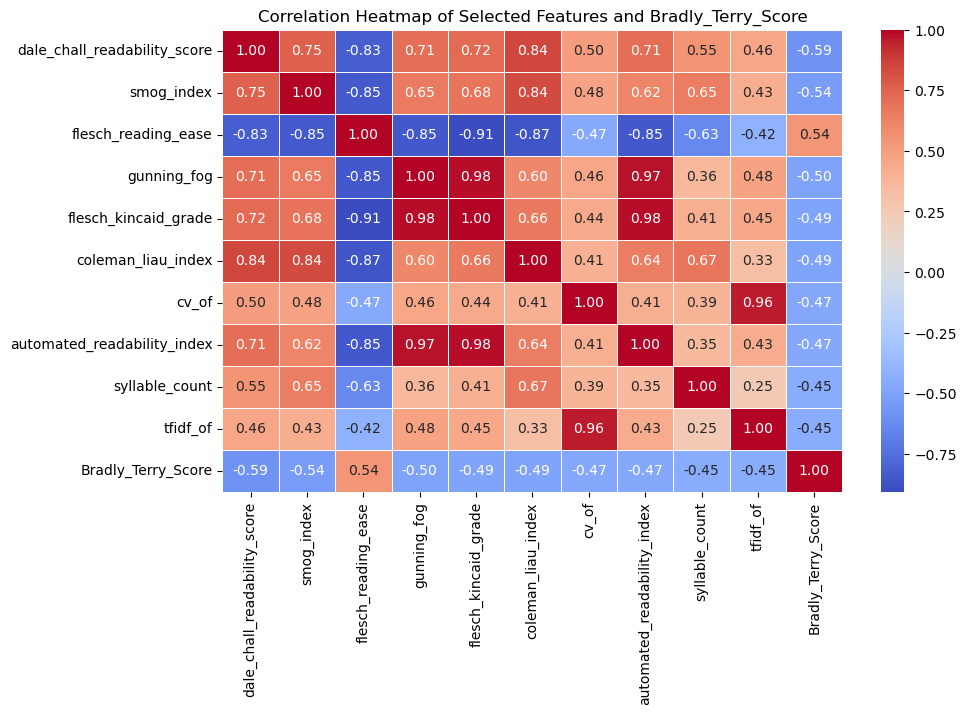

In [122]:
# Select top n features with highest absolute correlation
corr_top_features = correlations.abs().sort_values(ascending=False).head(10).index

# Print the selected top features
print("Selected Top Features: ", corr_top_features)

# Create a new DataFrame with the top features and the target
selected_data = full_df[corr_top_features.to_list() + ['Bradly_Terry_Score']]

# Compute the correlation matrix for the selected features and target
corr_matrix = selected_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features and Bradly_Terry_Score")
plt.show()

#### Recursive Feature Elimination (RFE)

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Get the feature columns
X = full_df[correlations.index]
y = full_df['Bradly_Terry_Score']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize a linear regression model
model = LinearRegression()

# Apply RFE with n features to select
rfe = RFE(model, n_features_to_select=100)

# Fit the RFE model
rfe = rfe.fit(X_scaled, y)

# Get the selected features
rfe_top_features = X.columns[rfe.support_]
print("RFE Selected Features: ", rfe_top_features)

RFE Selected Features:  Index(['tfidf_1837', 'tfidf_amperes', 'tfidf_aniline', 'tfidf_ascertained',
       'tfidf_botanists', 'tfidf_bromide', 'tfidf_compensation',
       'tfidf_contradiction', 'tfidf_correspond', 'tfidf_criterion',
       'tfidf_cultivate', 'tfidf_dissolving', 'tfidf_durability', 'tfidf_eder',
       'tfidf_empirical', 'tfidf_gelatino', 'tfidf_gramme', 'tfidf_hardness',
       'tfidf_headache', 'tfidf_hydrochloric', 'tfidf_hygroscopic',
       'tfidf_imagery', 'tfidf_incidentally', 'tfidf_incrustation',
       'tfidf_indications', 'tfidf_indirectly', 'tfidf_intelligible',
       'tfidf_modifications', 'tfidf_nigh', 'tfidf_nought', 'tfidf_oft',
       'tfidf_oxalate', 'tfidf_parameters', 'tfidf_penetrated',
       'tfidf_perchance', 'tfidf_perforated', 'tfidf_permitting',
       'tfidf_pouillet', 'tfidf_revolutions', 'tfidf_siemens', 'tfidf_singly',
       'tfidf_sodium', 'tfidf_solvent', 'tfidf_subsequently', 'tfidf_sulphate',
       'tfidf_sulphuric', 'tfidf_travers

* Create multiple linear regression models using Bradley_Terry_Score as the target variable, testing with three different test set sizes: 20%, 25%, and 30%. Cross-validate all models and summarize the test set metrics, including Mean Absolute Deviation (MAD), and R-squared (R²) in a table to identify the best model. Assess the suitability of developing a regression model for this problem, and provide your rationale based on the data and analysis results.

In [139]:
len(correlations.index)

2365

In [140]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer

# Scale the features
scaler = StandardScaler()

# Separate features and target
X = full_df[rfe_top_features]
y = full_df['Bradly_Terry_Score']

def evaluate_regression_model(test_size=.2):

    # Split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Scale input features
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    # Initialize the model
    linear_model = LinearRegression()

    # Fit data
    linear_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = linear_model.predict(X_test)

    # Evaluate model
    mad = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross validation using 5-fold cross-validation
    cv_mad = cross_val_score(linear_model, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error)).mean()
    cv_r2 = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='r2').mean()

    return {"test_size": test_size,
            "r2_score": r2,
            "mad_score": mad,
            "r2_cv_score": cv_r2,
            "mad_cv_score": cv_mad}

# Evaluate model with different test set sizes
results = []
for test_size in [.2, .25, .3]:
    results.append(evaluate_regression_model(test_size))

# Transform results into DF
results_df = pd.DataFrame(results)

# Display
results_df.head()

,test_size,r2_score,mad_score,r2_cv_score,mad_cv_score
0,0.20,-5.374231e+25,8.387708e+11,-1.073458e+27,2.570470e+12
1,0.25,-2.158472e+25,5.183003e+11,-3.091596e+26,2.223433e+12
2,0.30,-4.670371e+25,7.244756e+11,-6.019036e+26,2.957140e+12


### Problem 2. 
You use the data from problem 1 with numerical columns for this problem.
* Create a new column called "difficulty_level" that has 6 classes: very_hard, hard, challenging, moderate, easy, very_easy using the Bradly_Terry_Score scores. Note that negative scores mean harder to read, and positive scores mean easier to read. Use the boundary points as <-2.05, <-1.45, <-0.95, <-0.5, <0.08, and >= 0.08. Then use the feature selection method(s) for a classification model to select features to classify  difficulty_level.
* Now create classification model(s) (of your choice) with difficulty_level as a target variable. Use three different test set sizes 20%, 25%, and 30%. Make sure to cross-validate your models. Summarize the classification accuracy score using a table and pick your best model.
* Make a test set precision, recall, and F1 score table for your best model in part 2. Note that we have a multiclass classification problem. Use your best model to determine which of the 6 classes the following text excerpt should belong to?


#### Create `difficulty_level` column

In [125]:
from sklearn.preprocessing import LabelEncoder
class_df = full_df.copy()
label_encoder = LabelEncoder()

# define bins and corresponding labels for dificculty
bins = [-np.inf, -2.05, -1.45, -0.95, -0.5, 0.08, np.inf]
labels = ["very_hard", "hard", "challenging", "moderate", "easy", "very_easy"]

# apply the above to the taget column
class_df['difficulty_level'] = pd.cut(class_df['Bradly_Terry_Score'], bins=bins, labels=labels)
class_df['difficulty_level_label'] = label_encoder.fit_transform(class_df['difficulty_level'])

#### Feature selection to classification model

In [126]:
from sklearn.linear_model import LogisticRegression

# Separating input and target features
X = class_df[correlations.index]
y = class_df['difficulty_level_label']

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Initialize Logistic Regression
logit_model = LogisticRegression()

# Perform RFE
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Perform RFE to select the top n features
logit_top_features = X_train.columns[rfe.support_]
print("Selected Features: ", logit_top_features)

Selected Features:  Index(['tfidf_account', 'tfidf_acid', 'tfidf_by', 'tfidf_hungry', 'tfidf_per',
       'tfidf_provided', 'tfidf_quantity', 'tfidf_sister', 'tfidf_was',
       'cv_account'],
      dtype='object')


* Now create classification model(s) (of your choice) with difficulty_level as a target variable. Use three different test set sizes 20%, 25%, and 30%. Make sure to cross-validate your models. Summarize the classification accuracy score using a table and pick your best model.

In [141]:
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer, f1_score, recall_score

# Scale the features
scaler = StandardScaler()

# Separate features and target
X = class_df[rfe_top_features]
y = class_df['difficulty_level_label']


# Evaluate model with different test set sizes
results = []
for test_size in [.2, .25, .3]:
    # Split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Scale input features
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    # Initialize the model
    logit_model = LogisticRegression()

    # Fit data
    logit_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = logit_model.predict(X_test)

    # Evaluate model
    lg_f1_score = f1_score(y_test, y_pred, average='weighted')
    lg_recall_score = recall_score(y_test, y_pred, average='weighted')

    # Cross validation using 5-fold cross-validation
    lg_f1_cv_score = cross_val_score(logit_model, X_train, y_train, cv=5, scoring='f1_weighted').mean()
    lg_recall_cv_score = cross_val_score(logit_model, X_train, y_train, cv=5, scoring='recall_weighted').mean()

    results.append({"test_size": test_size,
            "lg_f1_score": lg_f1_score,
            "lg_recall_score": lg_recall_score,
            "lg_f1_cv_score": lg_f1_cv_score,
            "lg_recall_cv_score": lg_recall_cv_score})

# Transform results into DF
results_df = pd.DataFrame(results)

# Display
results_df.head()

,test_size,lg_f1_score,lg_recall_score,lg_f1_cv_score,lg_recall_cv_score
0,0.20,0.084872,0.192240,0.083317,0.189677
1,0.25,0.087929,0.196051,0.080846,0.186353
2,0.30,0.089113,0.197415,0.079659,0.186579


Use your best model to determine which of the 6 classes the following text excerpt should belong to?

In [128]:
new_excerpt = """Business analytics leverages advanced statistical modeling, predictive algorithms, and optimization techniques 
to derive actionable insights from organizational data. Data is sourced from systems like ERP and CRM, then processed 
through data pipelines for cleansing, normalization, and feature engineering. Analysts apply methods such as principal 
component analysis (PCA) and k-means clustering for dimensionality reduction and segmentation, respectively. 
Predictive models, including logistic regression, gradient boosting machines (GBM), and neural networks, 
are deployed for forecasting and classification tasks. Complex optimization techniques, such as mixed-integer linear 
programming (MILP), enhance resource allocation and operational planning. Tools like Python, R, and SQL, 
integrated with BI platforms like Tableau, support dynamic visualizations and scenario analysis, 
driving strategic decision-making.
"""

new_data = pd.DataFrame({"text": [new_excerpt]})
new_data.head()

,text
0,Business analytics leverages advanced statisti...


In [129]:
# Apply transformations
new_data['tokens'] = new_data['text'].apply(lambda x: [word.lower() for word in word_tokenize(x)])
new_data['tokens'] = new_data['tokens'].apply(lambda x: [item for item in x if item not in stops])
new_data['subjectivity'] = new_data.apply(lambda x: TextBlob(x['text']).sentiment.subjectivity, axis=1)
new_data['polarity'] = new_data.apply(lambda x: TextBlob(x['text']).sentiment.polarity, axis=1)
new_data['sia_polarity'] = new_data['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
new_data['sia_neutrality'] = new_data['text'].apply(lambda x: sia.polarity_scores(x)['neu'])
new_data['flesch_reading_ease'] = new_data['text'].apply(lambda x: textstat.flesch_reading_ease(x))
new_data['flesch_kincaid_grade'] = new_data['text'].apply(lambda x: textstat.flesch_kincaid_grade(x))
new_data['gunning_fog'] = new_data['text'].apply(lambda x: textstat.gunning_fog(x))
new_data['smog_index'] = new_data['text'].apply(lambda x: textstat.smog_index(x))
new_data['automated_readability_index'] = new_data['text'].apply(lambda x: textstat.automated_readability_index(x))
new_data['dale_chall_readability_score'] = new_data['text'].apply(lambda x: textstat.dale_chall_readability_score(x))
new_data['coleman_liau_index'] = new_data['text'].apply(lambda x: textstat.coleman_liau_index(x))
new_data['linsear_write_formula'] = new_data['text'].apply(lambda x: textstat.linsear_write_formula(x))
new_data['syllable_count'] = new_data['text'].apply(lambda x: textstat.syllable_count(x))
new_data['char_count'] = new_data['text'].apply(lambda x: textstat.char_count(x))
new_data['word_count'] = new_data['text'].apply(lambda x: textstat.lexicon_count(x))

# tfidf_vectorizer
tfidf_matrix = tfidf_vectorizer.transform(new_data['text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.columns = ['tfidf_' + col for col in tfidf_df.columns]
new_data = pd.concat([new_data, tfidf_df], axis=1)

# CountVectorizer
X = vectorizer.transform(new_data['text'])
feature_names = vectorizer.get_feature_names_out()
features_df = pd.DataFrame(X.toarray(), columns=feature_names)
features_df.columns = ['cv_' + col for col in features_df.columns]
new_data = pd.concat([new_data, features_df], axis=1)

# Select pre-existing columns only
new_data = new_data[features.columns]

# Display
rows, columns = new_data.shape
print(f"The dataset contains {rows:,} rows and {columns} columns")
new_data.head()

The dataset contains 1 rows and 53681 columns


,subjectivity,polarity,sia_polarity,sia_neutrality,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,dale_chall_readability_score,...,cv_µv,cv_½d,cv_ædui,cv_ægidus,cv_æmilius,cv_æneas,cv_æolian,cv_æquians,cv_æschylus,cv_ça
0,0.377778,0.016667,0.9674,0.803,1.94,17.6,19.29,17.1,22.0,15.51,...,0,0,0,0,0,0,0,0,0,0


In [130]:
# Make predictions
inference_df = new_data[rfe_top_features]
inference_df = scaler.transform(inference_df)
inference_df = pd.DataFrame(inference_df, columns=rfe_top_features)
inference_df['difficulty_level_label_pred'] = logit_model.predict(inference_df)
inference_df

,smog_index,dale_chall_readability_score,coleman_liau_index,tfidf_action,tfidf_little,tfidf_may,tfidf_why,cv_action,cv_little,cv_why,difficulty_level_label_pred
0,2.148287,5.068731,5.071405,-0.133183,-0.455525,-0.298488,-0.262387,-0.13395,-0.450967,-0.26423,5


### Problem 3.  
Do the following.
* Let's define a term: lexical_diversity = (number of words in the text)/ (number of unique words in the text). Find and print the most diverse and least diverse text using the definition above. What is the range of the lexical diversity score?
* Find two lists of texts: the top 10 most similar and the top 10 most dissimilar excerpts in the original text data compared to the new excerpt using the cosine similarity metric. Then, repeat this process using the Jaccard Similarity coefficient as outlined on page 232 of the Web Data Mining book.(https://www.cs.uic.edu/~liub/WebMiningBook.html)
* Use the process explained in  6.7.3 An Example Example 12 of Web Data Mining Book pages 246-248 to find out the document matrix A and use the SVD  to write A as a product of $U$, $\Sigma$, and $V^T$ for the 6 text documents below with the given keyword list. 

In [ ]:
# Define a function to calculate lexical diversity
def lexical_diversity(text):
    num_words = len(text)  
    unique_words = len(set(text))  
    if unique_words == 0: 
        return 0
    return num_words / unique_words

# Apply the function to each text excerpt in the DataFrame
df['lexical_diversity'] = df['text'].apply(lexical_diversity)

# Find the most and least diverse texts
most_diverse = df.loc[df['lexical_diversity'].idxmax()]
least_diverse = df.loc[df['lexical_diversity'].idxmin()]

# Calculate the range of lexical diversity scores
lexical_diversity_range = df['lexical_diversity'].max() - df['lexical_diversity'].min()

# Print results
print("Most Diverse Text:")
print(most_diverse['text'])
print(f"Lexical Diversity Score: {most_diverse['lexical_diversity']}\n")

print("Least Diverse Text:")
print(least_diverse['text'])
print(f"Lexical Diversity Score: {least_diverse['lexical_diversity']}\n")

print(f"Range of Lexical Diversity Scores: {lexical_diversity_range}")


In [131]:
# Quotes
Henry_Ford = "Whether you think you can, or you think you can’t—you’re right."
Andrew_Carnegie = "The first one gets the oyster, the second gets the shell."
Warren_Buffett = "Someone’s sitting in the shade today because someone planted a tree a long time ago."
Mary_Kay_Ash = "Pretend that every single person you meet has a sign around their neck that says, 'Make me feel important.' Not only will you succeed in sales, you will succeed in life."
Richard_Branson = "Business opportunities are like buses, there’s always another one coming."
Jack_Welch = "Change before you have to."

# Keywords
keywords = [
    'Opportunity', 'Success', 'Vision', 'Innovation', 'Leadership', 'Strategy', 
    'Growth', 'Change', 'Ambition', 'Determination', 'Value', 'Persistence', 
    'Leadership', 'Sales', 'Transformation'
]


### Problem 4.  (Refer to Chapter 7 of Web Data Mining Book for this problem.)
Upload and read the social network connections dataset containing two columns (id_1 and id_2), representing the connections between individuals. 
* Calculate the total number of connections for each ID by aggregating the values from both columns, treating each as a connection count for an individual. Identify the top 10 IDs with the most connections, and print them in descending order to highlight the central actors in the network.
* Remove all IDs that have 300 or fewer connections from both columns (id_1 and id_2) to focus on the more central actors within the network. Display the shape of the filtered dataset to verify the reduced size and check the value counts of id_1 to understand the distribution of connections after filtering. Verify that all remaining IDs have more than 300 connections.
* Create a network graph for the ID with the most connections, adding labels, titles, and highlighting the central node to show its importance. Then, compute the betweenness centrality for the network, which indicates how nodes bridge others. Find the top 10 IDs with the highest centrality scores and display them in a bar chart with clear labels and titles to illustrate their significance.  
Helpful link.
https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html

In [132]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [133]:
data_loc = "/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/MIS 546 - Advanced Business Analytics/Data/"
file_name = "sn_ids.csv"

sn_df = pd.read_csv(data_loc + file_name)
rows, columns = sn_df.shape
print(f"The dataset contains {rows:,} rows and {columns} columns")
sn_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/MIS 546 - Advanced Business Analytics/Data/sn_ids.csv'